In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score

ModuleNotFoundError: No module named 'sklearn'

In [1]:
# Load the dataset
file_path = 'training_data.csv'
data = pd.read_csv(file_path)
data['increase_stock_binary'] = data['increase_stock'].apply(lambda x: 1 if x == 'high_bike_demand' else 0)

# Manually combining weather data with only numerical values

# Creating a "Feels-Like" Temperature feature
def calculate_feels_like_temp(temp, humidity, wind_speed):
    # Constants for the formula
    c1 = -8.78469475556
    c2 = 1.61139411
    c3 = 2.33854883889
    c4 = -0.14611605
    c5 = -0.012308094
    c6 = -0.0164248277778
    c7 = 0.002211732
    c8 = 0.00072546
    c9 = -0.000003582

    apparent_temp = (c1 + (c2 * temp) + (c3 * humidity) + (c4 * temp * humidity) +
                     (c5 * temp**2) + (c6 * humidity**2) + (c7 * temp**2 * humidity) +
                     (c8 * temp * humidity**2) + (c9 * temp**2 * humidity**2))

    # Adjusting for wind speed (only if temperature is below 10 degrees Celsius)
    if temp < 10:
        wind_chill = 13.12 + 0.6215 * temp - 11.37 * wind_speed**0.16 + 0.3965 * temp * wind_speed**0.16
        return min(apparent_temp, wind_chill)
    else:
        return apparent_temp

# Apply the function to the dataset
data['feels_like_temp'] = data.apply(lambda x: calculate_feels_like_temp(x['temp'], x['humidity'], x['windspeed']), axis=1)


# Creating "workday" feature
data['workday'] = data.apply(lambda row: 1 if row['day_of_week'] < 5 and row['holiday'] == 0 else 0, axis=1)

# Daytime: day 7-18: 1, night 19 - 6: 0
data['daytime'] = data['hour_of_day'].apply(lambda x: 1 if x in np.arange(7, 19) else 0)

# Dropping original features used in composition
data = data.drop(['temp', 'humidity', 'windspeed','snow', 'dew', 'increase_stock', 'holiday', 'weekday',

                   'day_of_week','summertime', 'month', 'hour_of_day', 'cloudcover', 'month'] , axis=1)



# Displaying the modified DataFrame
data.head()


NameError: name 'pd' is not defined


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       262
           1       0.59      0.34      0.43        58

    accuracy                           0.84       320
   macro avg       0.73      0.65      0.67       320
weighted avg       0.82      0.84      0.82       320

Accuracy Score: 0.8375


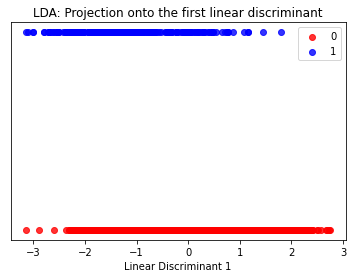

In [163]:
#Initialize training data and test data
X = data.drop(['snow', 'increase_stock', 'increase_stock_binary', 'dew', 'summertime', 'weekday'], axis=1) # , 'dew', 'summertime', 'weekday'
y = data['increase_stock_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Calculate the correlation matrix
# corr_matrix = X_train.corr()

# #Plot a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.show()

# # Standardizing the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


# Creating the classifier to the data 
lda = LDA(n_components=1)

# Fitting the classifier with the training data
lda.fit(X_train, y_train)

# Prediction on test data 
y_predic = lda.predict(X_test)

# Evaluation
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_predic))
print("\nClassification Report:\n", classification_report(y_test, y_predic))
print("Accuracy Score:", accuracy_score(y_test, y_predic))

#Plot 
classes = np.unique(y)
colors = ['red', 'blue', 'green', 'purple', 'orange']  # Adjust as needed

X_lda = lda.fit_transform(X, y)
for i, class_name in enumerate(classes):
    plt.scatter(X_lda[y == class_name], np.zeros_like(X_lda[y == class_name]) + i, 
                alpha=0.8, color=colors[i], label=class_name)

plt.title('LDA: Projection onto the first linear discriminant')
plt.xlabel('Linear Discriminant 1')
plt.yticks([])
plt.legend(loc='best')
plt.show()



In [155]:
# Creating the classifier to the data 
qda = QDA()

# Fitting the classifier with the training data
qda.fit(X_train, y_train)

# Prediction on test data 
y_predic = qda.predict(X_test)

# Evaluation
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_predic))
print("\nClassification Report:\n", classification_report(y_test, y_predic))
print("Accuracy Score:", accuracy_score(y_test, y_predic))



Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.49      0.63       262
           1       0.24      0.72      0.36        58

    accuracy                           0.53       320
   macro avg       0.56      0.61      0.49       320
weighted avg       0.77      0.53      0.58       320

Accuracy Score: 0.53125


c:\Users\Asus\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
